# Import Data

In [1]:
# Data: https://www.kaggle.com/wendykan/lending-club-loan-data/data
loan <- read.csv("C:/Users/yuanq/Desktop/bittiger/loan.csv", stringsAsFactors = FALSE)
loanT <- loan

# Missing Value

In [2]:
loan$dti <- ifelse(!is.na(loan$dti_joint), loan$dti_joint, loan$dti)#we want to change the value of dti_joint with NA to the value of dti
#if the value dti_joint is NA, we will change it to the value of dti. If not, keep the origin dti_joint value

In [3]:
loan$annual_inc <- ifelse(!is.na(loan$annual_inc_joint), loan$annual_inc_joint, loan$annual_inc)#same way with annual_inc_joint

In [4]:
num.NA <- sort(sapply(loan, function(x) {sum(is.na(x))}), decreasing=TRUE)
num.NA

dti_joint            annual_inc_joint 
                     886870                      886868 
                    il_util          mths_since_rcnt_il 
                     868762                      866569 
                open_acc_6m                  open_il_6m 
                     866007                      866007 
                open_il_12m                 open_il_24m 
                     866007                      866007 
               total_bal_il                 open_rv_12m 
                     866007                      866007 
                open_rv_24m                  max_bal_bc 
                     866007                      866007 
                   all_util                      inq_fi 
                     866007                      866007 
                total_cu_tl                inq_last_12m 
                     866007                      866007 
     mths_since_last_record mths_since_last_major_derog 
                     750326                      665676 
     mths_since_last_delinq                tot_coll_amt 
                     454312                       70276 
                tot_cur_bal            total_rev_hi_lim 
                      70276                       70276 
                 revol_util  collections_12_mths_ex_med 
                        502                         145 
                delinq_2yrs              inq_last_6mths 
                         29                          29 
                   open_acc                     pub_rec 
                         29                          29 
                  total_acc              acc_now_delinq 
                         29                          29 
                 annual_inc                          id 
                          4                           0 
                  member_id                   loan_amnt 
                          0                           0 
                funded_amnt             funded_amnt_inv 
                          0                           0 
                       term                    int_rate 
                          0                           0 
                installment                       grade 
                          0                           0 
                  sub_grade                   emp_title 
                          0                           0 
                 emp_length              home_ownership 
                          0                           0 
        verification_status                     issue_d 
                          0                           0 
                loan_status                  pymnt_plan 
                          0                           0 
                        url                        desc 
                          0                           0 
                    purpose                       title 
                          0                           0 
                   zip_code                  addr_state 
                          0                           0 
                        dti            earliest_cr_line 
                          0                           0 
                  revol_bal         initial_list_status 
                          0                           0 
                  out_prncp               out_prncp_inv 
                          0                           0 
                total_pymnt             total_pymnt_inv 
                          0                           0 
            total_rec_prncp               total_rec_int 
                          0                           0 
         total_rec_late_fee                  recoveries 
                          0                           0 
    collection_recovery_fee                last_pymnt_d 
                          0                           0 
            last_pymnt_amnt                next_pymnt_d 
                          0                           0 
         last_credit_pull_d 

### Keep the column that its missing value less than 50%

In [5]:
remain.col <- names(num.NA)[which(num.NA <= 0.5 * dim(loan)[1])]
loan <- loan[, remain.col]

In [6]:
num.NA <- sort(sapply(loan, function(x) {sum(is.na(x))}), decreasing=TRUE)
num.NA

tot_coll_amt                tot_cur_bal 
                     70276                      70276 
          total_rev_hi_lim                 revol_util 
                     70276                        502 
collections_12_mths_ex_med                delinq_2yrs 
                       145                         29 
            inq_last_6mths                   open_acc 
                        29                         29 
                   pub_rec                  total_acc 
                        29                         29 
            acc_now_delinq                 annual_inc 
                        29                          4 
                        id                  member_id 
                         0                          0 
                 loan_amnt                funded_amnt 
                         0                          0 
           funded_amnt_inv                       term 
                         0                          0 
                  int_rate                installment 
                         0                          0 
                     grade                  sub_grade 
                         0                          0 
                 emp_title                 emp_length 
                         0                          0 
            home_ownership        verification_status 
                         0                          0 
                   issue_d                loan_status 
                         0                          0 
                pymnt_plan                        url 
                         0                          0 
                      desc                    purpose 
                         0                          0 
                     title                   zip_code 
                         0                          0 
                addr_state                        dti 
                         0                          0 
          earliest_cr_line                  revol_bal 
                         0                          0 
       initial_list_status                  out_prncp 
                         0                          0 
             out_prncp_inv                total_pymnt 
                         0                          0 
           total_pymnt_inv            total_rec_prncp 
                         0                          0 
             total_rec_int         total_rec_late_fee 
                         0                          0 
                recoveries    collection_recovery_fee 
                         0                          0 
              last_pymnt_d            last_pymnt_amnt 
                         0                          0 
              next_pymnt_d         last_credit_pull_d 
                         0                          0 
               policy_code           application_type 
                         0                          0 
 verification_status_joint 
                         0

### Data Cleaning & Feature Engineering

Default

In [26]:
default = subset(loan, loan_status == 'Default')

In [8]:
table(loan$loan_status)


                                        Charged Off 
                                              45248 
                                            Current 
                                             601779 
                                            Default 
                                               1219 
Does not meet the credit policy. Status:Charged Off 
                                                761 
 Does not meet the credit policy. Status:Fully Paid 
                                               1988 
                                         Fully Paid 
                                             207723 
                                    In Grace Period 
                                               6253 
                                             Issued 
                                               8460 
                                  Late (16-30 days) 
                                               2357 
                                 Late (31-120

In [11]:
# remove certain string from loan_status
loan$loan_status <- gsub('Does not meet the credit policy. Status:','', loan$loan_status)

In [12]:
table(loan$loan_status)


       Charged Off            Current            Default         Fully Paid 
             46009             601779               1219             209711 
   In Grace Period             Issued  Late (16-30 days) Late (31-120 days) 
              6253               8460               2357              11591 

addr_state

In [13]:
int_state <- by(loan, loan$addr_state, function(x) {return(mean(x$int_rate))})

In [14]:
quantile(int_state)

0%      25%      50%      75%     100% 
11.34583 13.08099 13.28857 13.41240 13.92262

In [18]:
#collapsing
loan$state_mean_int <- 
  ifelse(loan$addr_state %in% names(int_state)[which(int_state <= 13.08099)],'low',
  ifelse(loan$addr_state %in% names(int_state)[which(int_state <= 13.28857)],'low_medium', 
  ifelse(loan$addr_state %in% names(int_state)[which(int_state <= 13.41239)],'medium_high','high')))

In [19]:
table(loan$state_mean_int)


       high         low  low_medium medium_high 
     115323       77792      458950      235314 

In [21]:
library(ggplot2)

Warning message:
"package 'ggplot2' was built under R version 3.4.3"

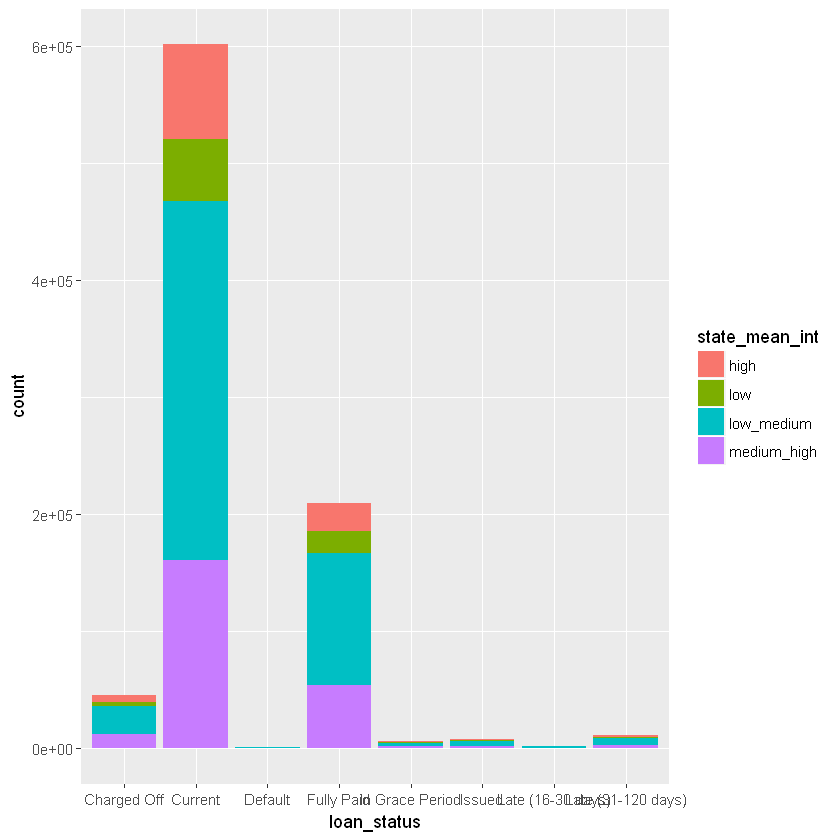

In [23]:
ggplot(data=loan) + geom_bar(mapping = aes(x = loan_status, fill = state_mean_int))

number of default in each state

In [56]:
default_state = as.data.frame(table(default$addr_state)) 

In [59]:
colnames(default_state) = c('state','freq')

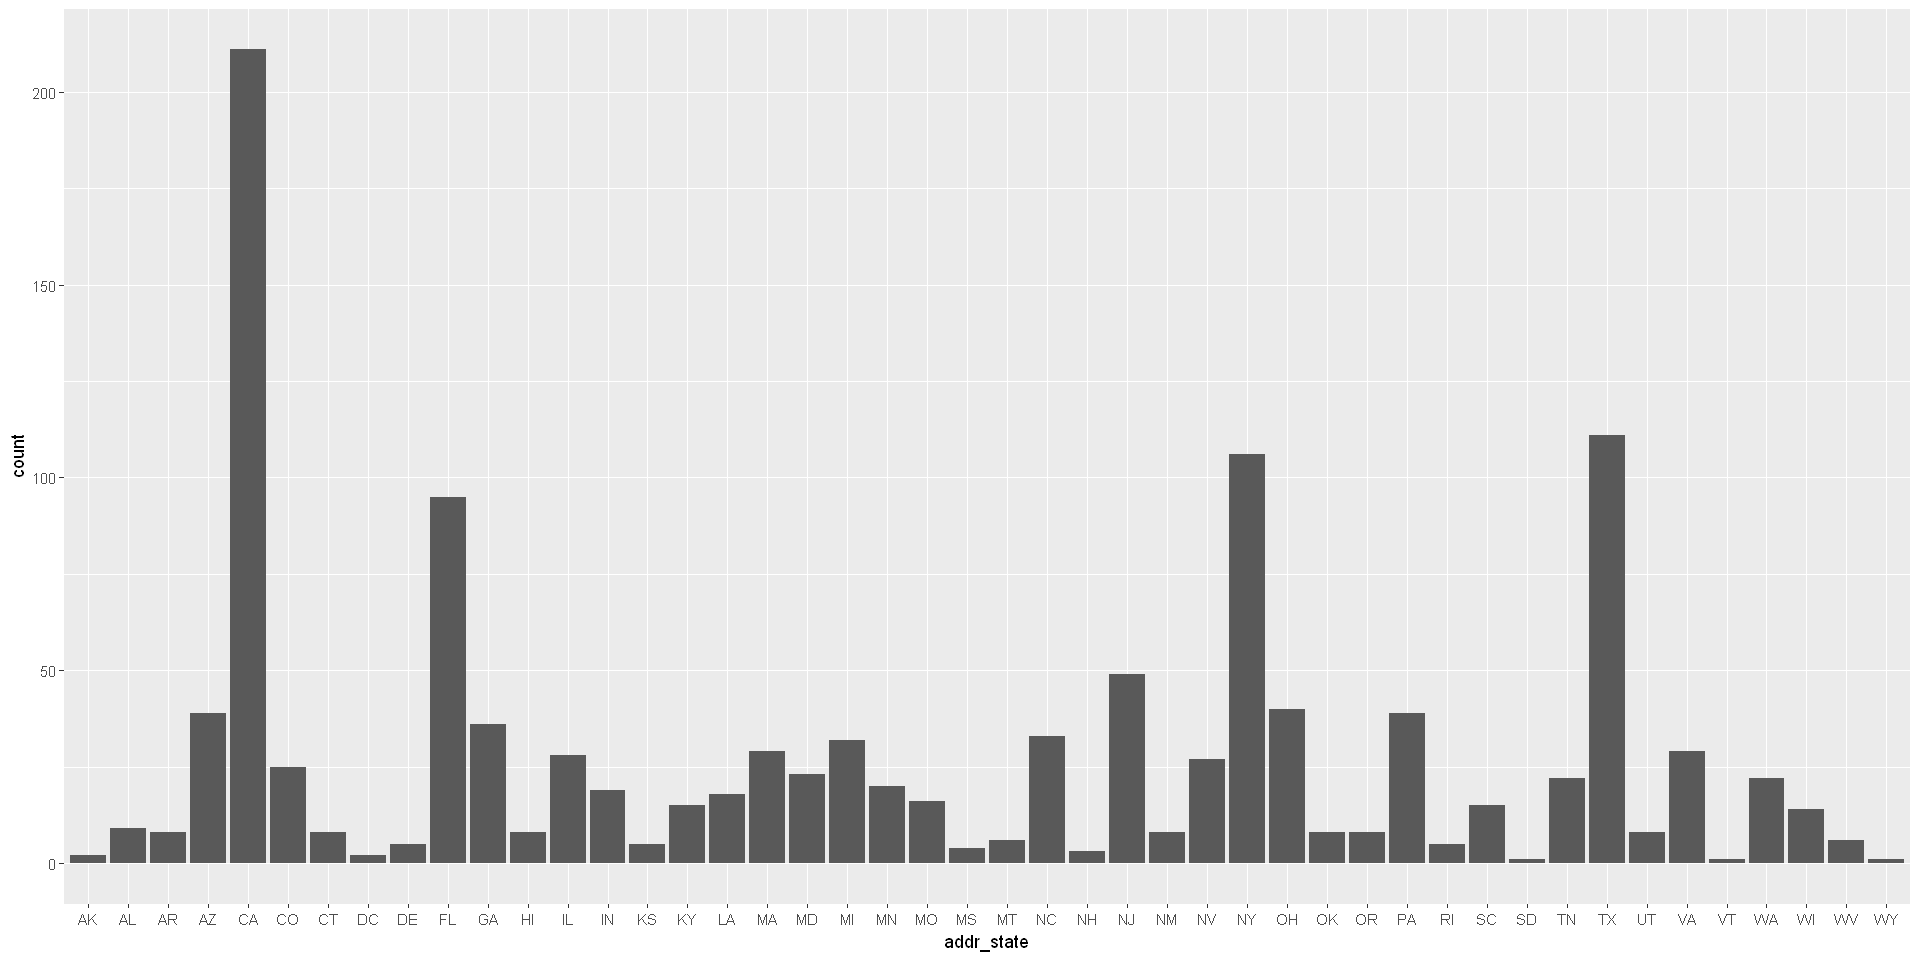

In [30]:
options(repr.plot.width=16, repr.plot.height=8)
ggplot(data=default) + geom_bar(mapping = aes(x = addr_state))

In [71]:
default_state

state,freq
AK,2
AL,9
AR,8
AZ,39
CA,211
CO,25
CT,8
DC,2
DE,5
FL,95


In [75]:
library(maps)

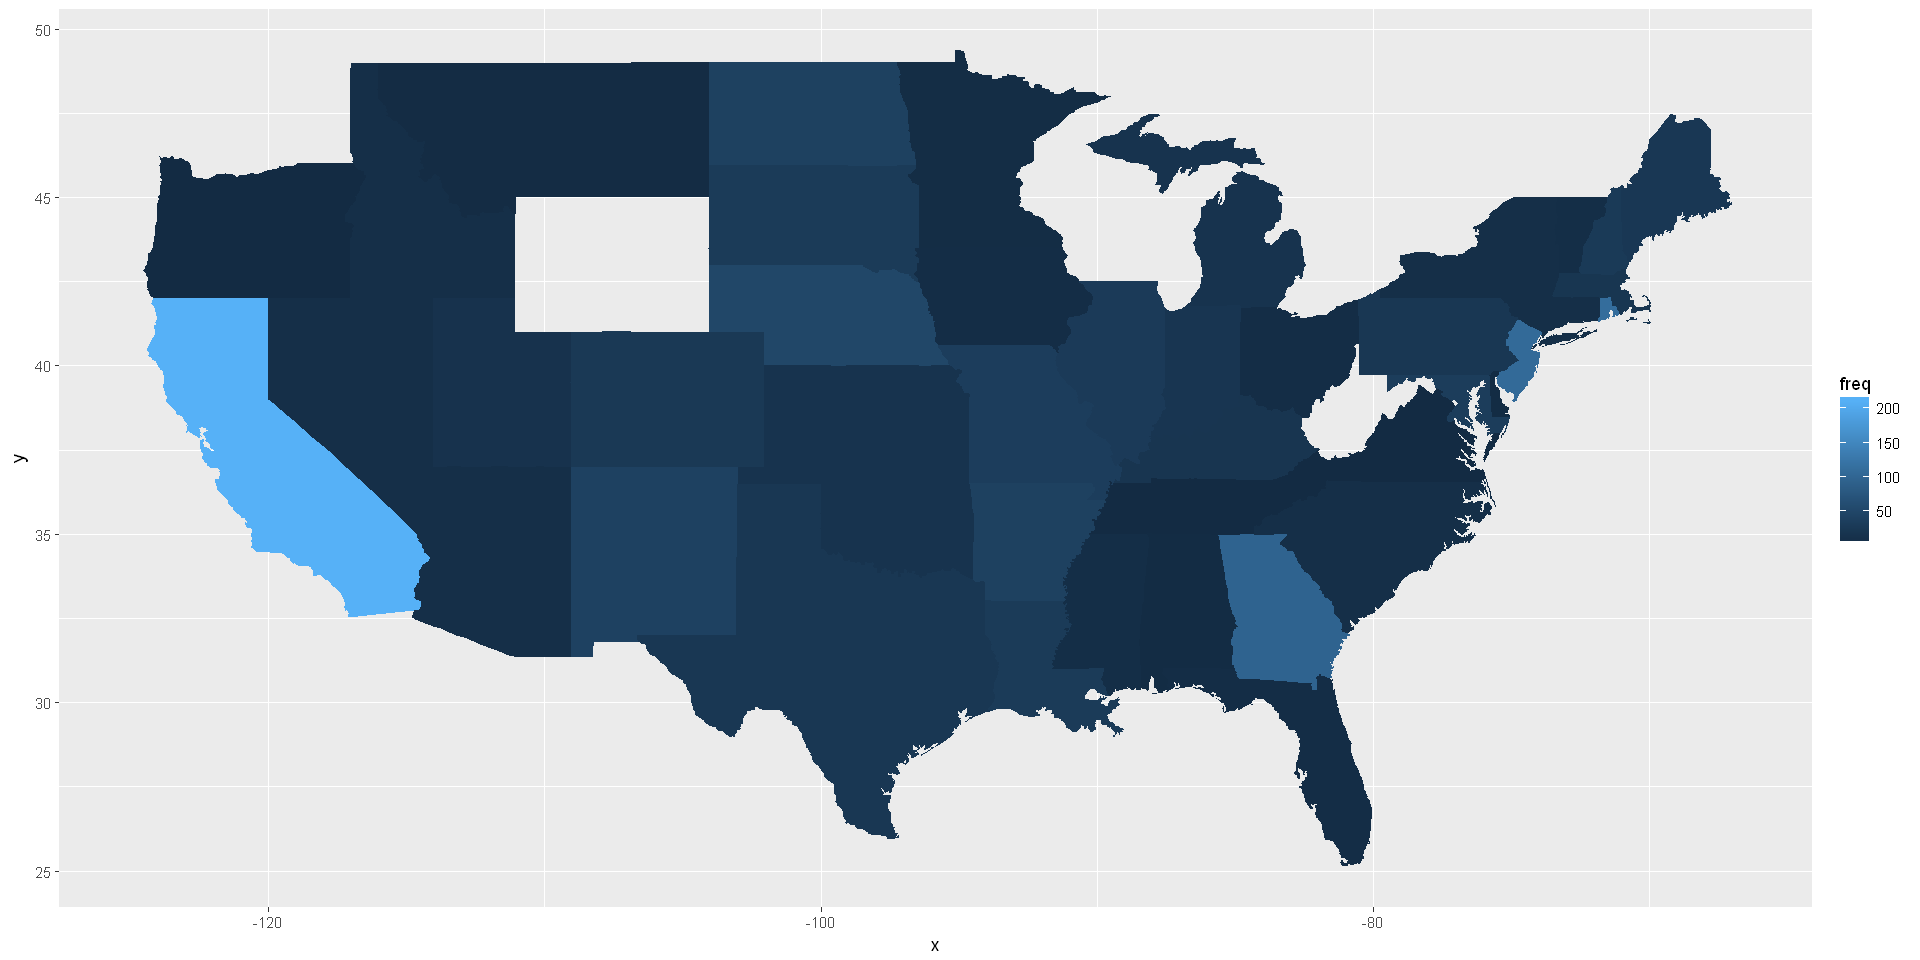

In [96]:
data <- data.frame(freq = default_state$freq, state = tolower(state.name[default_state$state])) 
map <- map_data("state")
ggplot(data, aes(fill = freq))  + geom_map(aes(map_id = state), map = map) +
expand_limits(x = map$long, y = map$lat)